# Table des matieres :

* [Analyse](#analyse)
    * [chiffre d'affaires globale  2021](#turnover21)
    * [chiffre d'affaires globale par mois 2021](#turnover21month)
    * [courbe de lorenz prix](#lorenz)
    * [chiffre d'affaires par catégorie 2021](#turnover21categ)
    * [nombre de ventes par catégorie 2021](#nbsell21categ)
    * [nombre de ventes par jour  en octobre](#nbselloct21)
    * [variation des prix par catégories ](#pricevariation)
    * [chiffre d'affaires par tranche d'âge 2021](#turnoverage21)
    * [nombre de ventes par tranche d'âge 2021](#nbsellage21)
    * [chiffre d'affaires par genre 2021](#turnover21sex)
    * [chiffre d'affaires et ventes  par tranche d'âge, genre et catégorie 2021](#turnovercateggender21)
    * [panier](#basket)
    * [2022](#2022)
* [Corrélation](#correlation)

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

sns.set_theme(style="darkgrid")
warnings.simplefilter(action='ignore')

In [2]:
# fonction pour la courbe de lorenz et indice de gini 
def lorenz_plot(var) :
    n = len(var)
    lorenz = np.cumsum(np.sort(var)) / var.sum()
    lorenz = np.append([0],lorenz)
    plt.axes().axis('equal')
    xaxis = np.linspace(0-1/n,1+1/n,n+1) 
    plt.plot(xaxis,lorenz,drawstyle='steps-post')
    plt.gca().set_aspect('equal', adjustable = 'box')
    x = [0, 1]
    y = [0, 1]

    plt.plot(x, y, 'green')
    plt.ylabel("pourcentage du Chiffre d'affaires")
    plt.xlabel('pourcentage des prix produits')
    
    medial = len(lorenz[lorenz <= 0.5]) / len(lorenz)
    plt.plot([0, medial], [0.5, 0.5], color='#f70028', linestyle=':', linewidth=2, label="Medial")
    plt.plot([medial, medial], [0, 0.5], color='#f70028', linestyle=':', linewidth=2)
    
    print(medial)

    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.legend(['Courbe de concentration', 'Bissectrice'])
    plt.show()
    
def gini(var) :
    n = len(var)
    lorenz = np.cumsum(np.sort(var)) / var.sum()
    lorenz = np.append([0],lorenz)
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    gini = 2*S
    return gini

def slice_age (s):
    if s < 20 :
        s = '20>'
        return s
    if 20 <= s < 31 :
        s = '21-30'
        return s
    if 31 <= s < 41 :
        s = '31-40'
        return s
    if 41 <= s < 51 :
        s = '41-50'
        return s
    if 51 <= s < 61 :
        s = '51-60'
        return s
    if 61 <= s < 71 :
        s = '61-70'
        return s
    if 71 <= s < 81 :
        s = '71-80'
        return s
    if 81 <= s < 100 :
        s = '80<'
        return s


In [3]:
df_general = pd.read_csv('df_general.csv')
df_general['slice_age'] = df_general['age'].apply(slice_age)
df_general

,Unnamed: 0,id_prod,date,session_id,client_id,gender,birth,age,price,categ,slice_age
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977.0,45.0,4.99,0,41-50
1,1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000.0,22.0,65.75,2,21-30
2,2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979.0,43.0,10.71,1,41-50
3,3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963.0,59.0,4.20,0,51-60
4,4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980.0,42.0,8.99,0,41-50
...,...,...,...,...,...,...,...,...,...,...,...
336708,337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969.0,53.0,31.99,1,51-60
336709,337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991.0,31.0,22.99,0,31-40
336710,337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968.0,54.0,11.03,0,51-60
336711,337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994.0,28.0,50.99,2,21-30


# Analyse : <a class="anchor" id="analyse"></a>

## chiffre d'affaires globale 2021 : <a class="anchor" id="turnover21"></a>

In [4]:
def date_format_by_month(s) :
    return s[5:7]

df_general['month_number'] = df_general['date'].apply(date_format_by_month)

turnover_2021 = df_general[df_general['date'].str.match('^2021.*')== True]
turnover_2022 = df_general[df_general['date'].str.match('^2022.*')== True]
turnover_2021

,Unnamed: 0,id_prod,date,session_id,client_id,gender,birth,age,price,categ,slice_age,month_number
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977.0,45.0,4.99,0,41-50,04
2,2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979.0,43.0,10.71,1,41-50,09
3,3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963.0,59.0,4.20,0,51-60,10
4,4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980.0,42.0,8.99,0,41-50,07
5,5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982.0,40.0,3.99,0,31-40,09
...,...,...,...,...,...,...,...,...,...,...,...,...
336708,337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969.0,53.0,31.99,1,51-60,05
336709,337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991.0,31.0,22.99,0,31-40,06
336710,337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968.0,54.0,11.03,0,51-60,03
336711,337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994.0,28.0,50.99,2,21-30,10


In [5]:
turnover_2021_value = turnover_2021['price'].sum()
turnover_2021_value

4740881.579999999

#### Le chiffre d'affaires de l'année 2021 est de 4 736 845.95 euros

## Chiffre d'affaires par mois en 2021 <a class="anchor" id="turnover21month"></a>

In [6]:

turnover_2021_month = turnover_2021.groupby('month_number').sum()
turnover_2021_month = turnover_2021_month.reset_index()

turnover_2021_month

,month_number,Unnamed: 0,birth,age,price,categ
0,03,4825115524,56485184.0,1261114.0,479312.03,11764
1,04,4779772392,56180727.0,1246095.0,472980.72,10581
2,05,4769015405,55851818.0,1243396.0,489367.95,11413
3,06,4519077169,53034239.0,1179625.0,481257.94,12602
4,07,4190384043,48886368.0,1081296.0,480898.66,13125
5,08,4335793076,50665130.0,1118290.0,479305.19,11850
6,09,5592202830,65754257.0,1485331.0,502771.28,11016
7,10,3628941025,42698007.0,930687.0,319159.96,3986
8,11,4776248507,55895885.0,1259989.0,512890.17,15062
9,12,5431719175,64091729.0,1455445.0,522937.68,14011


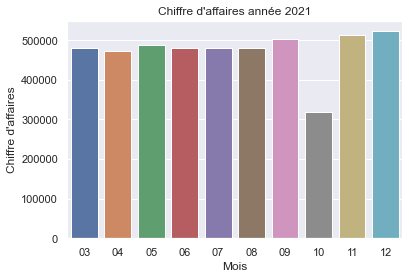

In [7]:
ax = sns.barplot(x="month_number", y="price", data=turnover_2021_month)
ax.set(xlabel='Mois', ylabel="Chiffre d'affaires", title="Chiffre d'affaires année 2021")
plt.show()


In [8]:
turnover_mars_sept = turnover_2021_month[(turnover_2021_month['month_number'] != '10') &(turnover_2021_month['month_number'] != '11')&(turnover_2021_month['month_number'] != '12')]
turnover_mars_sept['price'].describe()

count         7.000000
mean     483699.110000
std        9687.811369
min      472980.720000
25%      479308.610000
50%      480898.660000
75%      485312.945000
max      502771.280000
Name: price, dtype: float64

#### La moyenne du chiffre d'affaires entre mars et septembre 2021 est de 483 699.10 euros 

In [9]:
turnover_oct = turnover_2021[turnover_2021['month_number'] == '10']
turnover_oct_cat = turnover_oct.groupby('categ').sum()
turnover_oct_cat = turnover_oct_cat.reset_index()
turnover_oct_cat['categ'] = turnover_oct_cat['categ'].apply(str)
turnover_oct['categ'] = turnover_oct['categ'].apply(str)
turnover_oct_cat

,categ,Unnamed: 0,birth,age,price
0,0,3161278584,37093532.0,820990.0,199217.94
1,1,281019474,3289068.0,79584.0,33762.32
2,2,186642967,2315407.0,30113.0,86179.70


##### Le chiffre d'affaires du mois d'octobre qui est de 319 159.96 euros est nettement inférieur à la moyenne des chiffres d'affaires des mois  qui le précèdent c'est à dire 483 699.10 euros

### courbe de lorenz pour les prix par catégories : <a class="anchor" id="lorenz"></a>

0.7652664955892992


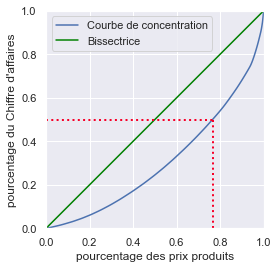

In [10]:
lorenz_plot(turnover_2021['price'])

##### On constate que 76 % des produits représentent 50 % du chiffre d'affaires ce qui veut dire que les 24 % des produits restants représentent l'autre moitié du chiffre d'affaires.

### Chiffre d'affaires par catégorie pour le mois d'octobre : <a class="anchor" id="turnovercategoct21"></a>

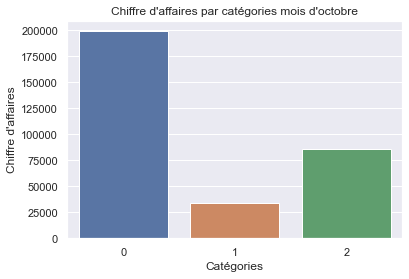

In [11]:
ax2 = sns.barplot(x="categ", y="price", data=turnover_oct_cat)
ax2.set(xlabel='Catégories', ylabel="Chiffre d'affaires", title="Chiffre d'affaires par catégories mois d'octobre")
plt.show()


#### Nombre de ventes par catégorie pour le mois d'octobre :

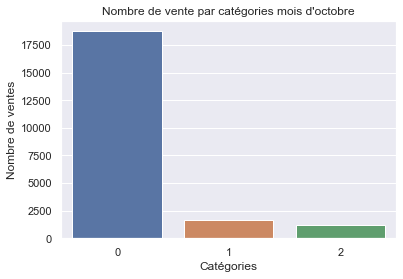

In [12]:
nb_sell_categ_oct = turnover_oct.groupby('categ').count().reset_index()

ax3 = sns.barplot(x="categ", y="price", data=nb_sell_categ_oct)
ax3.set(xlabel='Catégories', ylabel='Nombre de ventes', title="Nombre de vente par catégories mois d'octobre")
plt.show()


#### Nombres de ventes par mois 2021 :

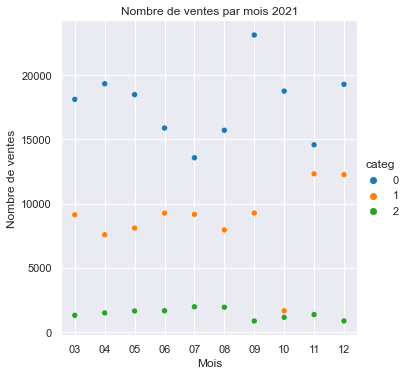

In [13]:
nb_sells_2021_month = turnover_2021.groupby(['categ','month_number']).count().reset_index()
nb_sells_2021_month = nb_sells_2021_month[['categ', 'month_number', 'price']]

ax4 = sns.relplot(
    data=nb_sells_2021_month,
    x='month_number',
    y='price',
    hue='categ',
    palette = 'tab10'
)
ax4.set(xlabel='Mois', ylabel='Nombre de ventes', title="Nombre de ventes par mois 2021")


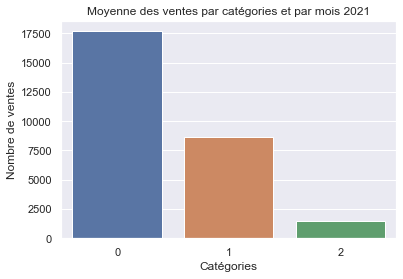

In [14]:
# nombre de ventes en moyenne par mois pour chaque catégorie 

mean_sell_month = turnover_2021.groupby(['categ','month_number']).count().reset_index()
mean_sell_month  = mean_sell_month[['categ', 'month_number', 'price']].groupby('categ').mean().reset_index()
mean_sell_month

ax5 = sns.barplot(x="categ", y="price", data=mean_sell_month)
ax5.set(xlabel='Catégories', ylabel='Nombre de ventes', title="Moyenne des ventes par catégories et par mois 2021")
plt.show()

#### On constate que durant le mois d'octobre il y'a eu une nette diminution du nombre de ventes des livres de catégorie 1 ce nombre est largement en-dessous de la moyenne du nombre de ventes  par mois qui est d'environ 8000 alors que pour le mois d'octobre on atteint à peine les 2500 ventes .

## Chiffre d'affaires par catégorie <a class="anchor" id="turnover21categ"></a>

### Chiffre d'affaires par catégorie 2021 :

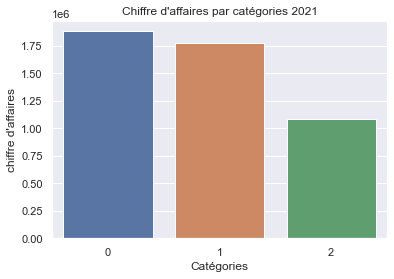

In [15]:


turnover_categ_2021 = turnover_2021.groupby('categ').sum().reset_index()

ax6 = sns.barplot(x="categ", y="price", data=turnover_categ_2021)
ax6.set(xlabel='Catégories', ylabel="chiffre d'affaires", title="Chiffre d'affaires par catégories 2021")

plt.show()

#### On constate que la catégorie de livre 0 est celle qui représente le plus gros chiffre d'affaires , suivie par la catégorie 1 et enfin la catégorie 2.

In [16]:
turnover_categ_2021

,categ,Unnamed: 0,birth,age,price
0,0,29840098492,349691958.0,7763268.0,1.882419e+06
1,1,14598717716,171211390.0,4128362.0,1.777996e+06
2,2,2409452938,28639996.0,369638.0,1.080466e+06


#### chiffre d'affaires par catégorie et par mois en 2021

       categ          price
count   10.0      10.000000
mean     0.0  188241.946000
std      0.0   29739.329498
min      0.0  144711.920000
25%      0.0  167729.950000
50%      0.0  194840.670000
75%      0.0  203674.237500
max      0.0  246264.210000
       categ          price
count   10.0      10.000000
mean     1.0  177799.585000
std      0.0   60620.232335
min      1.0   33762.320000
25%      1.0  163716.885000
50%      1.0  187748.720000
75%      1.0  190250.845000
max      1.0  252910.390000
       categ          price
count   10.0      10.000000
mean     2.0  108046.627000
std      0.0   29803.546326
min      2.0   65893.290000
25%      2.0   89327.645000
50%      2.0  107909.350000
75%      2.0  126572.082500
max      2.0  148635.990000


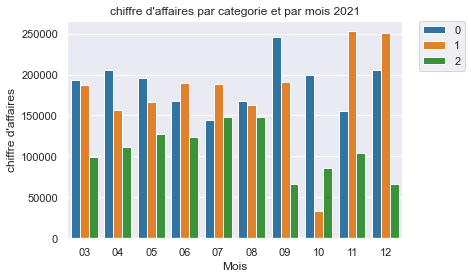

In [17]:
turnover_cat_2021_month = turnover_2021.groupby(['categ','month_number']).sum().reset_index()
turnover_cat_2021_month = turnover_cat_2021_month[['categ', 'month_number', 'price']]

ax6 = sns.barplot(
    data=turnover_cat_2021_month,
    x='month_number',
    y='price',
    hue='categ',
    palette='tab10'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax6.set(xlabel='Mois', ylabel="chiffre d'affaires", title="chiffre d'affaires par categorie et par mois 2021")
fig = ax6.get_figure()

fig.savefig("graph/analyse/turnover_cat_month_2021", pi=300)
print(turnover_cat_2021_month[turnover_cat_2021_month['categ'] == 0].describe())
print(turnover_cat_2021_month[turnover_cat_2021_month['categ'] == 1].describe())
print(turnover_cat_2021_month[turnover_cat_2021_month['categ'] == 2].describe())

### Nombre de ventes par catégories en 2021 :   
<a class="anchor" id="nbsell21categ"></a>

   categ   price
0      0  176783
1      1   86716
2      2   14347


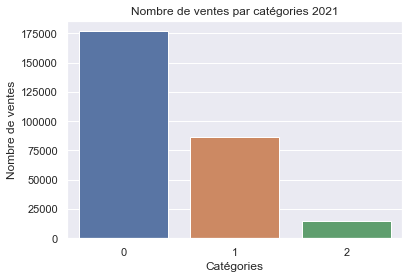

In [19]:
# nombre de ventes par catégorie en 2021
nb_sells_cat_2021 = turnover_2021.groupby('categ').count().reset_index()
nb_sells_cat_2021 = nb_sells_cat_2021[['categ', 'price']]

ax6 = sns.barplot(x="categ", y="price", data=nb_sells_cat_2021)
ax6.set(xlabel='Catégories', ylabel="Nombre de ventes", title="Nombre de ventes par catégories 2021")
print(nb_sells_cat_2021)

#### Les produits de la catégorie 0 sont ceux qui se sont le plus vendus au cours de l'année 2021 avec 176 783 ventes
#### Il y'a eu 86 716 ventes de produits de la catégorie 1
#### il y'a eu 14 347 ventes de produits de la catégorie 2 

###  nombre de ventes par jour  en octobre : <a class="anchor" id="nbselloct21"></a>

[Text(0.5, 0, 'Jours'),
 Text(0, 0.5, 'Nombre de ventes'),
 Text(0.5, 1.0, 'Nombre de ventes par catégories en octobre ')]

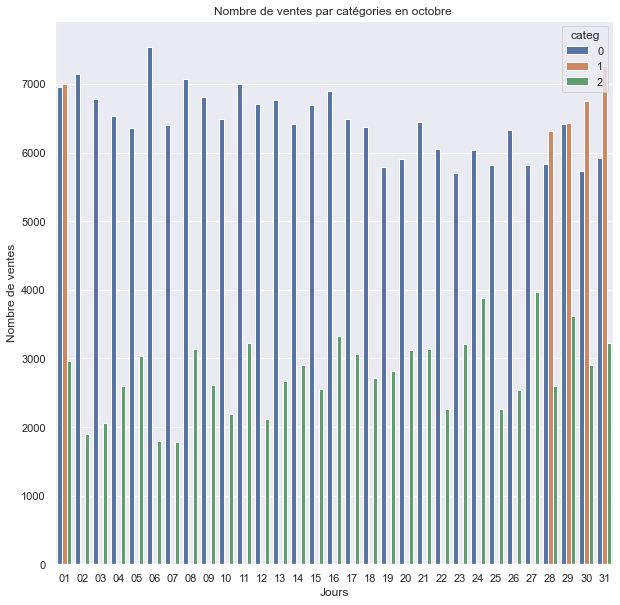

In [20]:
def day_format(s) :
    return s[8:10]
    
turnover_oct['day'] = turnover_oct['date'].apply(day_format)

turnover_oct_cat_1 = turnover_oct.groupby(['day','categ']).sum().reset_index()

plt.subplots(figsize=(10, 10))
ax7 = sns.barplot(x="day", y="price", hue='categ', data=turnover_oct_cat_1)
ax7.set(xlabel='Jours', ylabel="Nombre de ventes", title="Nombre de ventes par catégories en octobre ")


#### Absence de vente des produits de la catégorie 1 du 2 octobre au 27 octobre 

### variation des prix par catégories : <a class="anchor" id="pricevariation"></a>

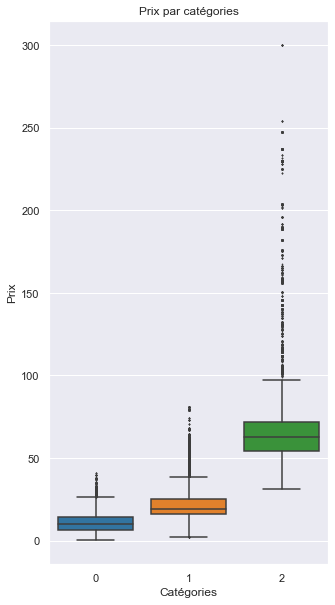

catégorie 0 count    176783.000000
mean         10.648193
std           4.933342
min           0.620000
25%           6.300000
50%           9.990000
75%          14.450000
max          40.990000
Name: price, dtype: float64
catégorie 1 count    86716.000000
mean        20.503665
std          7.600012
min          2.000000
25%         15.810000
50%         19.080000
75%         24.980000
max         80.990000
Name: price, dtype: float64
catégorie 2 count    14347.000000
mean        75.309561
std         39.039011
min         30.990000
25%         53.990000
50%         62.830000
75%         71.990000
max        300.000000
Name: price, dtype: float64


In [21]:
# variation des prix par catégorie 
turnover_2021_cat_0 = turnover_2021[turnover_2021['categ'] ==0]
turnover_2021_cat_1 = turnover_2021[turnover_2021['categ'] ==1]
turnover_2021_cat_2 = turnover_2021[turnover_2021['categ'] ==2]

plt.subplots(figsize=(5, 10))
ax8 =sns.boxplot(x = turnover_2021['categ'], y = turnover_2021['price'], palette='tab10', fliersize=0.9)
ax8.set(xlabel='Catégories', ylabel="Prix", title="Prix par catégories")

plt.show()

print('catégorie 0',turnover_2021_cat_0['price'].describe())
print('catégorie 1',turnover_2021_cat_1['price'].describe())
print('catégorie 2',turnover_2021_cat_2['price'].describe())

##### Pour la catégorie 0 : le minimun est de 62 centimes et le maximum de 40.99 euros, mais 75 % des prix sont inférieurs à 14.45 euros
#####  * Pour la catégorie 1 : le minimum est de 2 euros et le maximum  de 80.99 euros, 75 % des prix sont au-dessus  de 15.81 euros 
#####  * Pour la catégorie 2 : le minimum est de 30.99 euros et le maximum  de 300 euros, 50 % des prix sont compris entre 53.99 et 71.99 euros

### chiffre d'affaires par tranches d'âge : <a class="anchor" id="turnoverage21"></a>


  slice_age   Unnamed: 0        birth        age       price  categ
0       20>   1297159280   15441045.0   140487.0   313201.87   9010
1     21-30   4033096867   47860809.0   600465.0   989260.32  28778
2     31-40  13680478689  161302672.0  2891816.0  1054551.94  18128
3     41-50  15660988652  183369872.0  4158496.0  1197410.81  20396
4     51-60   6488988418   75853192.0  2117150.0   633770.57  20781
5     61-70   3597387898   41744727.0  1394643.0   351353.40  11635
6     71-80   1442400899   16660437.0   639795.0   139218.01   4615
7       80<    647768443    7310590.0   318416.0    62114.66   2067


[Text(0.5, 0, "Catégories d'âge"),
 Text(0, 0.5, "Chiffre d'affaires"),
 Text(0.5, 1.0, "Chiffre d'affaires par tranches d'âge 2021")]

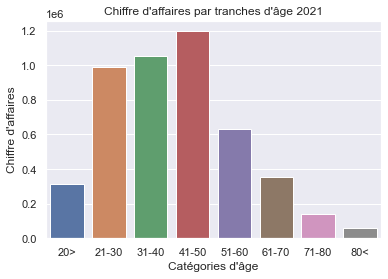

In [22]:
slice_age = turnover_2021.groupby('slice_age').sum().reset_index()
print(slice_age)
ax8 = sns.barplot(
    data=slice_age,
    x='slice_age',
    y='price',
    
)
ax8.set(xlabel="Catégories d'âge", ylabel="Chiffre d'affaires", title="Chiffre d'affaires par tranches d'âge 2021")


#### Le plus gros chiffre d'affaires est réalisé par la tranche d'âge des 41-50 ans 
#### Le plus petit chiffre d'affaires est réalisé par la tranche d'âge des plus de 80 ans

### nombre de ventes par tranches d'âge :  <a class="anchor" id="nbsellage21"></a>

[Text(0.5, 0, "Catégories d'âge"),
 Text(0, 0.5, 'Nombre de ventes'),
 Text(0.5, 1.0, "Nombre de ventes par tranches d'âge 2021")]

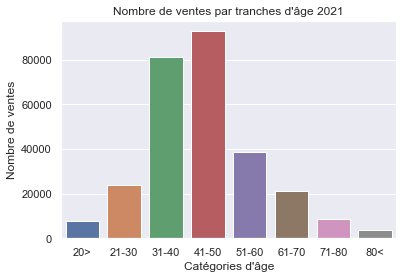

In [23]:
nb_sell_slice_age = turnover_2021.groupby('slice_age').count().reset_index()
ax9 = sns.barplot(
    data=nb_sell_slice_age,
    x='slice_age',
    y='price',
    
)
ax9.set(xlabel="Catégories d'âge", ylabel="Nombre de ventes", title="Nombre de ventes par tranches d'âge 2021")

## Chiffre d'affaires par genre  <a class="anchor" id="turnover21sex"></a>

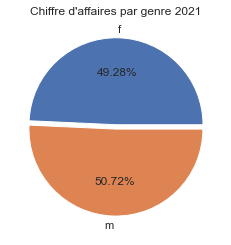

In [26]:
# chiffre d'affaires par genre 
df_gender = turnover_2021.groupby('gender').sum().reset_index()
df_gender = df_gender[['gender', 'price']]
fig10 = plt.figure()
ax10 = plt.axes()
ax10.pie(df_gender['price'], labels=['f', 'm'], autopct = lambda x: str(round(x, 2)) + '%', explode=[0.05,0])
ax10.set(title="Chiffre d'affaires par genre 2021")
plt.show()



##### Sur l'année 2021 les clients de genre féminin représentent 49,27 % du chiffre d'affaires et les clients de genre masculin 50.73 % du chiffre d'affaires .

[Text(0.5, 0, "Catégories d'âge"),
 Text(0, 0.5, 'Nombre de ventes'),
 Text(0.5, 1.0, "Nombre de ventes par tranches d'âge et par genre 2021")]

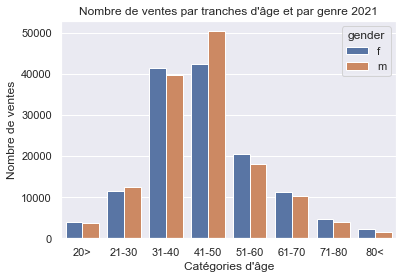

In [28]:
df_gender_age = turnover_2021.groupby(['gender', 'slice_age']).count().reset_index()

ax11 = sns.barplot(x="slice_age", y="price", hue='gender', data=df_gender_age)
ax11.set(xlabel="Catégories d'âge", ylabel="Nombre de ventes", title="Nombre de ventes par tranches d'âge et par genre 2021")

##### Les hommes entre 40 et 50 ans sont ceux qui sont les plus représentés

[Text(0.5, 0, "Catégories d'âge"),
 Text(0, 0.5, "Chiffre d'affaires"),
 Text(0.5, 1.0, "Chiffre d'affaires par tranches d'âge et par genre 2021")]

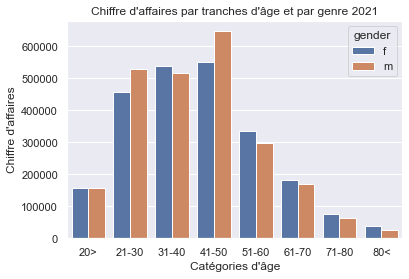

In [29]:
df_gender_age_turnover = turnover_2021.groupby(['gender', 'slice_age']).sum().reset_index()

ax9 = sns.barplot(x="slice_age", y="price", hue='gender', data=df_gender_age_turnover)
ax9.set(xlabel="Catégories d'âge", ylabel="Chiffre d'affaires", title="Chiffre d'affaires par tranches d'âge et par genre 2021")

#### Les hommes entre 41 et 50 ans sont ceux qui  produisent  le plus gros chiffre d'affaires

### Chiffre d'affaires et ventes  par genre , par âge et par catégorie : <a class="anchor" id="turnovercateggender21"></a>

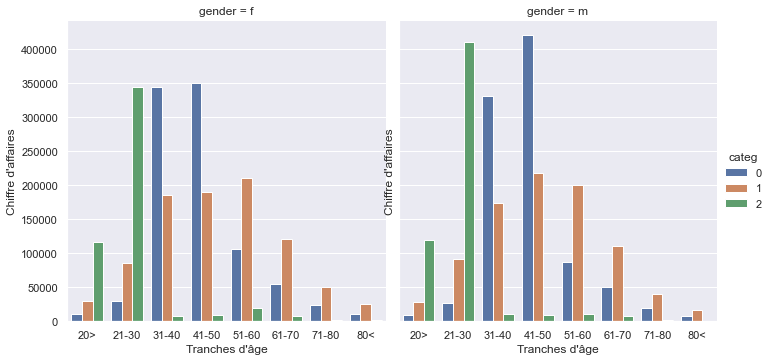

In [31]:
# chiffre d'affaires par genre dans chaque catégorie
turnover_gender_categ_2021 = turnover_2021.groupby(['gender', 'slice_age', 'categ']).sum().reset_index()
ax11 = sns.catplot(x="slice_age", y="price",
                hue="categ", col="gender",
                data=turnover_gender_categ_2021, kind="bar");
ax11.set(xlabel="Tranches d'âge", ylabel="Chiffre d'affaires")

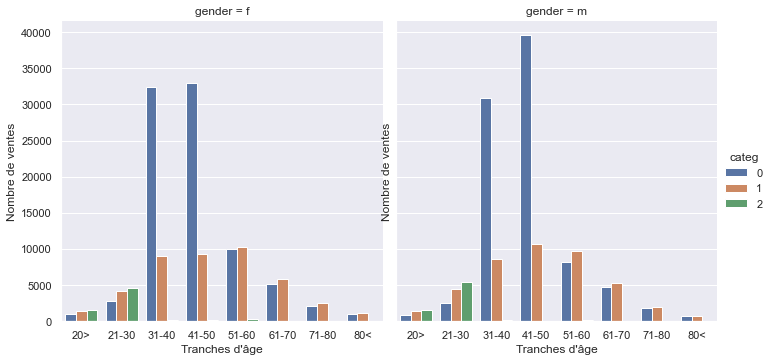

In [33]:
# nombre de ventes par genre dans chaque catégorie 
nb_sells_gender_categ_2021 = turnover_2021.groupby(['gender', 'slice_age', 'categ']).count().reset_index()
ax12 = sns.catplot(x="slice_age", y="price",
                hue="categ", col="gender",
                data=nb_sells_gender_categ_2021, kind="bar");
ax12.set(xlabel="Tranches d'âge", ylabel="Nombre de ventes")

### Panier : <a class="anchor" id="basket"></a>

[Text(0.5, 0, 'Genre'),
 Text(0, 0.5, "Nombre d'articles"),
 Text(0.5, 1.0, "Nombre d'articles par panier selon le genre")]

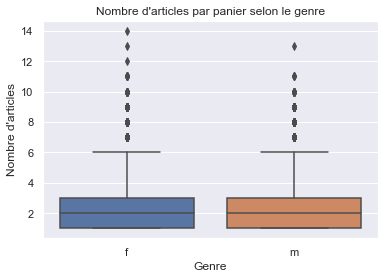

In [34]:
basket_gender = turnover_2021.groupby(['session_id', 'gender']).count().reset_index()
basket_gender = basket_gender[['gender','price']]

ax13 = sns.boxplot(x="gender", y='price', data=basket_gender)
ax13.set(xlabel="Genre", ylabel="Nombre d'articles", title="Nombre d'articles par panier selon le genre")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   slice_age  48 non-null     object 
 1   categ      48 non-null     int64  
 2   gender     48 non-null     object 
 3   price      48 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB


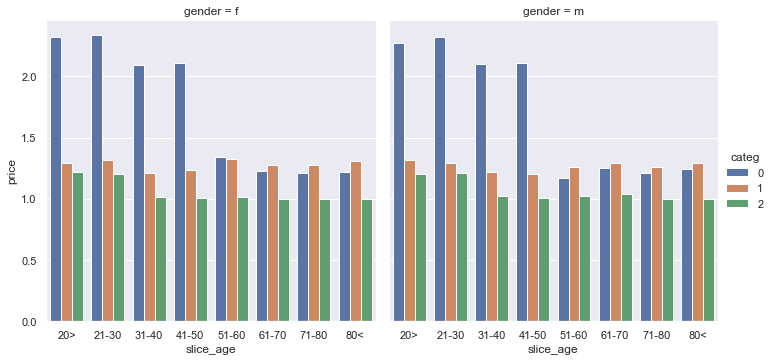

In [313]:
basket_categ = turnover_2021.groupby(['session_id', 'slice_age', 'categ','gender']).count().reset_index()
basket_categ = basket_categ[['slice_age', 'categ', 'price','gender']].groupby(['slice_age', 'categ','gender']).mean().reset_index()
basket_categ.info()
ax13 = sns.catplot(x="slice_age", y="price", hue='categ', col="gender", data=basket_categ, kind="bar")

### 2022 : <a class="anchor" id="2022"></a>

In [295]:
turnover_2022_value = turnover_2022['price'].sum()
turnover_2022_value

1055696.1900000002

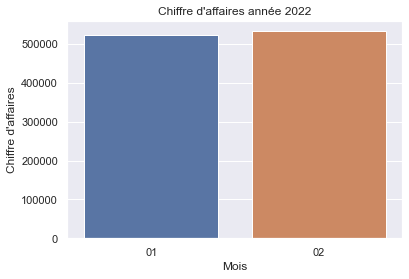

In [35]:
turnover_2022_month  = turnover_2022.groupby('month_number').sum().reset_index()
ax = sns.barplot(x="month_number", y="price", data=turnover_2022_month)
ax.set(xlabel='Mois', ylabel="Chiffre d'affaires", title="Chiffre d'affaires année 2022")
plt.show()

#### Chiffre d'affaires  de 1 055 696.19 euros

# Partie 3 : <a class="anchor" id="correlation"></a>

## Question 1 : Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

In [298]:
X = 'gender'
Y = 'categ'

cont = df_general[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
gender,,,,
f,103786,55469,8260,167515
m,105640,54266,9292,169198
Total,209426,109735,17552,336713


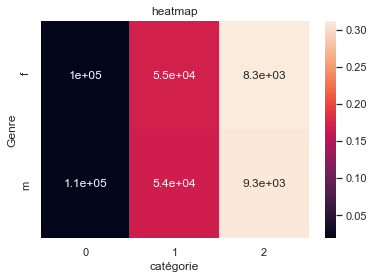

81.86933350990711


In [299]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_general)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
ax17 = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
ax17.set(xlabel="catégorie", ylabel="Genre", title="heatmap")

plt.show()
print(xi_n)
fig = ax17.get_figure()
fig.savefig("graph/correlation/question_1/heatmap_correl_1.jpeg")

#### khi-2 de 81.86

#### Il y'a une légere corrélation entre le sexe et les catégories . cette corrélation est plus forte pour la catégorie 2 .

### Question 2.1 : Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?

In [300]:
X = 'slice_age'
Y = 'price'

# regrouper les données par client_id 
sous_ech1 = df_general[['slice_age', 'price', 'age', 'client_id']].groupby(['client_id', 'slice_age']).sum().reset_index()
sous_ech1



,client_id,slice_age,price,age
0,c_1,61-70,300.65,1340.0
1,c_10,61-70,586.18,1848.0
2,c_100,21-30,222.87,180.0
3,c_1000,51-60,980.02,3136.0
4,c_1001,31-40,1102.45,2320.0
...,...,...,...,...
8595,c_995,61-70,119.08,536.0
8596,c_996,51-60,739.60,2184.0
8597,c_997,21-30,572.89,644.0
8598,c_998,21-30,1527.69,588.0


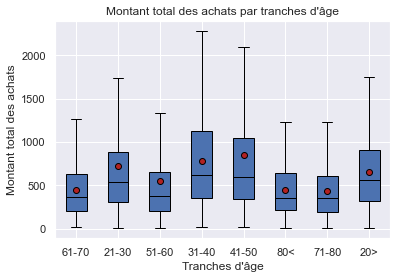

In [301]:
modalites = sous_ech1[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_ech1[sous_ech1[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
fig12 = plt.figure()
ax12 = plt.axes()  
ax12.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops )
ax12.set(xlabel="Tranches d'âge", ylabel="Montant total des achats", title="Montant total des achats par tranches d'âge")

plt.show()
fig = ax12.get_figure()
fig.savefig("graph/correlation/question_2/boxplot_correl_2.jpeg")

In [302]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [303]:
eta_squared(sous_ech1[X],sous_ech1[Y])

0.003099722940922621

##### Il y'a une très faible corrélation entre l'âge des clients et le montant total des achats.

### Question 2.2 : Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat ?

In [304]:
sous_ech3 = df_general[['slice_age', 'price', 'age', 'client_id', 'month_number']].groupby(['month_number','client_id']).count().reset_index()
sous_ech4 = df_general[['client_id', 'slice_age']]

sous_echantillon1 = sous_ech3.merge(sous_ech4, on='client_id')
sous_echantillon1

,month_number,client_id,slice_age_x,price,age,slice_age_y
0,01,c_1000,3,3,3,51-60
1,01,c_1000,3,3,3,51-60
2,01,c_1000,3,3,3,51-60
3,01,c_1000,3,3,3,51-60
4,01,c_1000,3,3,3,51-60
...,...,...,...,...,...,...
3412978,12,c_8498,2,2,2,21-30
3412979,12,c_8498,2,2,2,21-30
3412980,12,c_8531,3,3,3,20>
3412981,12,c_8531,3,3,3,20>


In [305]:
df_general[['client_id', 'age']]

sous_echantillon1 = sous_echantillon1.drop_duplicates()

sous_echantillon1 = sous_echantillon1[['client_id', 'price','slice_age_y', 'month_number']]
sous_echantillon = sous_echantillon1.groupby([sous_echantillon1['slice_age_y'],'month_number']).sum().reset_index()
sous_echantillon = sous_echantillon[['slice_age_y', 'month_number', 'price']]
sous_echantillon

,slice_age_y,month_number,price
0,20>,01,884
1,20>,02,940
2,20>,03,803
3,20>,04,756
4,20>,05,824
...,...,...,...
91,80<,08,347
92,80<,09,488
93,80<,10,226
94,80<,11,422


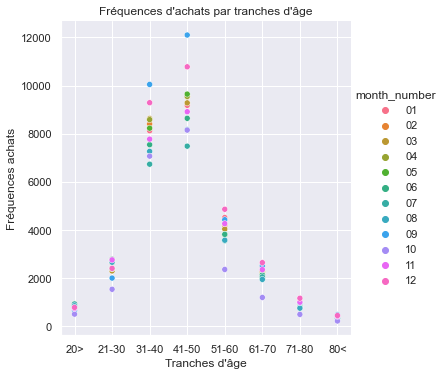

In [306]:
X = 'slice_age_y'
Y = 'price'


sns.set_theme()
ax13 = sns.relplot(
    data=sous_echantillon,
    x=X,
    y=Y,
    hue='month_number'
)
ax13.set(xlabel="Tranches d'âge", ylabel="Fréquences achats", title="Fréquences d'achats par tranches d'âge")

plt.show()


In [307]:
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.966064470366709

#### eta squared  égale à 0.96

##### On constate qu'il y'a une corrélation entre l'âge des clients et la fréquence d'achat  

### Question 2.3 : Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles) ?


In [308]:
#je considère qu'un panier représente une session d'achats 
sous_ech5 = df_general[['slice_age', 'price', 'age', 'client_id', 'session_id']].groupby(['session_id', 'slice_age']).count().reset_index()
sous_ech5 

,session_id,slice_age,price,age,client_id
0,s_1,51-60,1,1,1
1,s_10,51-60,1,1,1
2,s_100,41-50,2,2,2
3,s_1000,31-40,4,4,4
4,s_10000,31-40,3,3,3
...,...,...,...,...,...
169168,s_99994,31-40,3,3,3
169169,s_99995,61-70,1,1,1
169170,s_99996,41-50,4,4,4
169171,s_99997,41-50,1,1,1


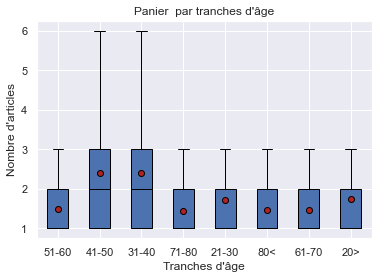

In [309]:
X = 'slice_age'
Y = 'price'



modalites = sous_ech5[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_ech5[sous_ech5[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
fig15 = plt.figure()
ax15 = plt.axes()  
ax15.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops )
ax15.set(xlabel="Tranches d'âge", ylabel="Nombre d'articles", title="Panier  par tranches d'âge")

plt.show()
fig = ax15.get_figure()
fig.savefig("graph/correlation/question_23/plot_correl_23.jpeg")


In [310]:
eta_squared(sous_ech5[X],sous_ech5[Y])

0.11925136325231647

##### On constate qu'il y'a une très légere corrélation entre l'âge et le montant moyen du panier 

### Question 2.3 : Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés ?

In [311]:
X = 'slice_age'
Y = 'categ'

cont = df_general[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
slice_age,,,,
20>,2156,3576,3798,9530
21-30,6193,10866,12338,29397
31-40,75173,22273,292,97738
41-50,86006,25172,283,111461
51-60,21481,25295,495,47271
61-70,11627,14228,222,26077
71-80,4753,5754,84,10591
80<,2037,2571,40,4648
Total,209426,109735,17552,336713


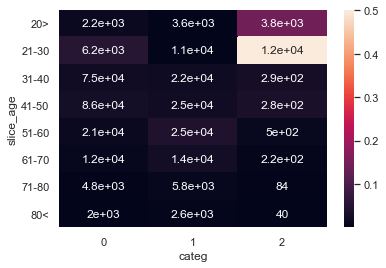

khi-2 : 152050.49648509864


In [312]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_general)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
ax16 = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()
print('khi-2 :', xi_n)
ax16.set(xlabel="Catégories", ylabel="Tranches d'âge", title="Valeurs Théoriques")

plt.show()
fig = ax16.get_figure()
fig.savefig("graph/correlation/question_24/heatmap_correl_23.jpeg")

#### Il existe une corrélation entre l'âge et les categories de produits achetés. On remarque que les moins de 20 ans et les 20-30 ans sont ceux qui achètent le plus de produit de la catégorie 2.